In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfclientes = pd.read_excel("caso_estudo.xlsx", sheet_name="clientes")
dflojas = pd.read_excel("caso_estudo.xlsx", sheet_name="lojas")
dfprodutos = pd.read_excel("caso_estudo.xlsx", sheet_name="produtos")
dfvendas = pd.read_excel("caso_estudo.xlsx", sheet_name="vendas")
dfpagamentos = pd.read_excel("caso_estudo.xlsx", sheet_name="pagamentos")

# Análise Premilinar 

In [3]:
dfclientes.sample(5)

,id,nome,sexo,dt_nasc
730,731,Otávio Silva,M,5/4/1986
284,285,Gustavo Dias,M,6/2/1992
357,358,Leila Carvalho,F,2/3/1985
846,847,Ágatha Oliveira,F,4/1/2001
603,604,Lucas Souza,M,8/18/1939


In [4]:
dfclientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
dfclientes[dfclientes.isnull().any(axis=1)]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
dfclientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

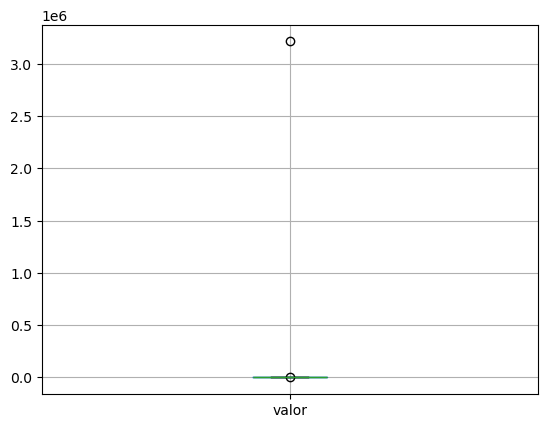

In [7]:
dfprodutos.boxplot(column=['valor'])
plt.show()

In [8]:
dfprodutos[dfprodutos.valor>300000]

,id,produto,valor
9,10,xxx-231a,3211352.0


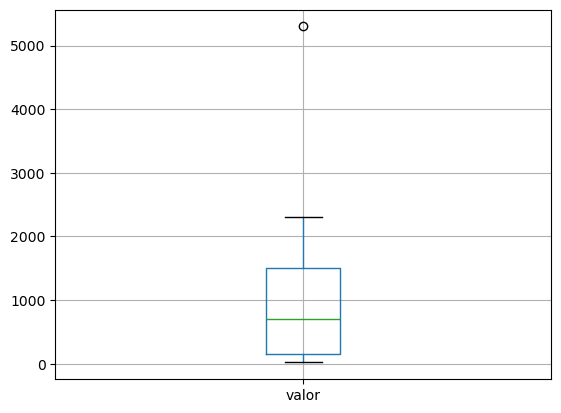

In [9]:
dfprodutos[dfprodutos.valor < 300000].boxplot(column=['valor'])
plt.show()

In [10]:
dfvendas[dfvendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [11]:
dfvendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [12]:
dfpagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


# Datacleaning

## dados nulos

In [13]:
dfclientes.loc[dfclientes.nome.isnull(), 'nome'] ='Sem nome'
dfclientes.loc[dfclientes.sexo.isnull(), 'sexo'] ='O'
dfclientes.loc[dfclientes.dt_nasc.isnull(), 'dt_nasc'] ='1/1/2025'

In [14]:
dfclientes.drop(columns=['nomedt_nasc', 'SEXO'], inplace=True, errors='ignore')
dfclientes.loc[dfclientes['nome'] == 'O', 'nome'] = None

In [15]:
dfclientes.loc[dfclientes['nome'].isnull(), 'nome'] = 'Sem nome'
dfclientes.loc[dfclientes['sexo'].isnull(), 'sexo'] = 'O'
dfclientes.loc[dfclientes['dt_nasc'].isnull(), 'dt_nasc'] = '1/1/2025'

In [16]:
dfclientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2025
287,288,Victor Ribeiro,O,12/17/1974


In [17]:
dfclientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [18]:
dfpagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

## Outliers

In [19]:
dfprodutos.loc[9, 'valor'] = dfprodutos.valor[9]/10000
dfprodutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [20]:
dfprodutos.boxplot(column=['valor'])

<Axes: >

## Inconsistências

In [21]:
dfvendas[dfvendas.id_cliente.isin(dflojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda
200,201,4,2,3,2018-03-17
221,222,4,2,4,2018-03-27
228,229,8,2,3,2018-03-28
293,294,3,6,3,2018-04-21
668,669,8,2,10,2018-08-05
707,708,2,9,6,2018-08-26
773,774,9,10,4,2018-09-16
839,840,6,4,3,2018-10-04
919,920,5,2,4,2018-10-28
936,937,5,2,3,2018-11-05


In [22]:
dfpagamentos[dfpagamentos.id_venda.isin(dfvendas.id)]

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [23]:
dfvendas[dfvendas.id.isin(dfpagamentos.id_venda)]

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
4,5,18,9,1,2018-01-05
6,7,485,10,6,2018-01-06
...,...,...,...,...,...
2989,2990,583,9,3,2020-09-24
2991,2992,228,9,5,2020-09-25
2993,2994,204,6,4,2020-09-25
2995,2996,671,3,7,2020-09-27


## Dados Duplicados 

In [24]:
dfclientes[dfclientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [25]:
dfclientes.duplicated().sum()

np.int64(0)

In [26]:
dfclientes[dfclientes.nome =='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [27]:
dfclientes.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [28]:
dfprodutos.produto.duplicated().sum()

np.int64(0)

In [29]:
dflojas.cidade.duplicated().sum()

np.int64(0)

In [30]:
dfvendas[dfvendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [31]:
dfvendas[(dfvendas.id_cliente==559) & (dfvendas.id_loja==2)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22
823,824,559,2,3,2018-10-03


In [32]:
dfpagamentos.drop('id', axis=1).duplicated().sum()

np.int64(0)

## formatos de dados

In [33]:
dfclientes.dt_nasc = pd.to_datetime(dfclientes.dt_nasc, format= '%m/%d/%Y')
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Definindo index

In [34]:
dfclientes =dfclientes.set_index('id')
dfclientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [35]:
dflojas =dflojas.set_index('id')
dfprodutos =dfprodutos.set_index('id')
dfvendas =dfvendas.set_index('id')
dfpagamentos =dfpagamentos.set_index('id')

# Data Fusion

In [36]:
df = dfvendas.join(dfclientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dflojas.add_prefix('loja_'), on= 'id_loja')
df = df.join(dfprodutos.add_prefix('produto_'), on= 'id_produto')

In [37]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [38]:
df = df.join(dfpagamentos.set_index('id_venda'))

In [39]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [40]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering

In [41]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [42]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [43]:
from datetime import date
df['cliente_idade'] = df['cliente_dt_nasc'].apply(
    lambda x: date.today().year - x.year - ((date.today().month, date.today().day) < (x.month, x.day))
)

# Análises

In [44]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

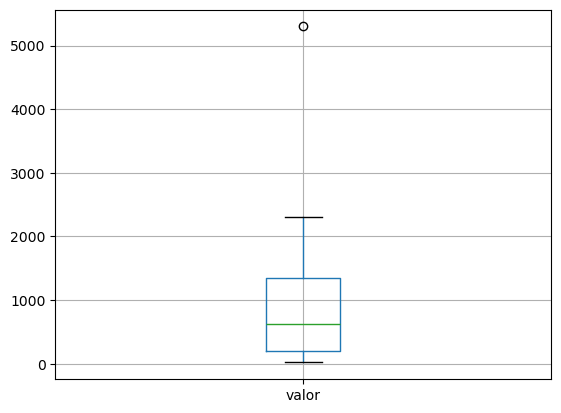

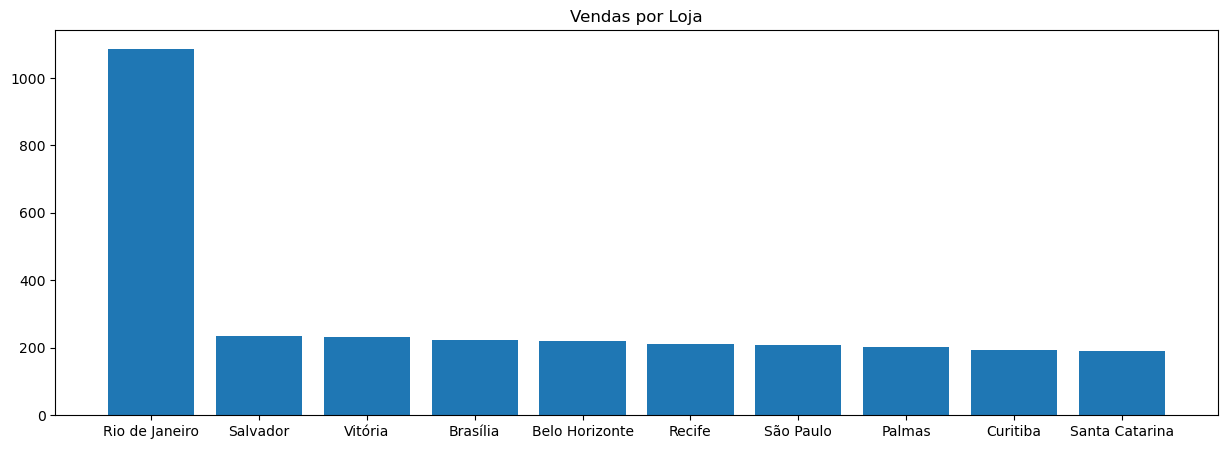

In [45]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por Loja')
plt.show()

## Produtos que mais vendem

In [46]:
graf_produtos = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)

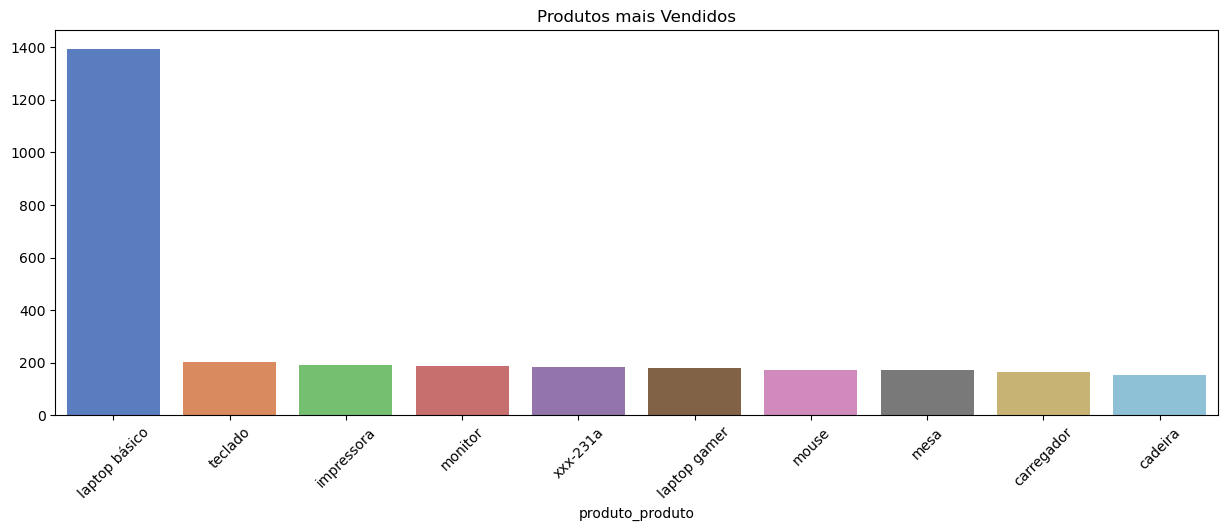

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x=graf_produtos.index, y=graf_produtos.values,hue= graf_produtos.index, palette='muted')
plt.title('Produtos mais Vendidos')
plt.xticks(rotation=45)  
plt.show()

## Receita por Loja

In [48]:
graf_dado = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().sort_values(ascending=False, by='produto_valor')

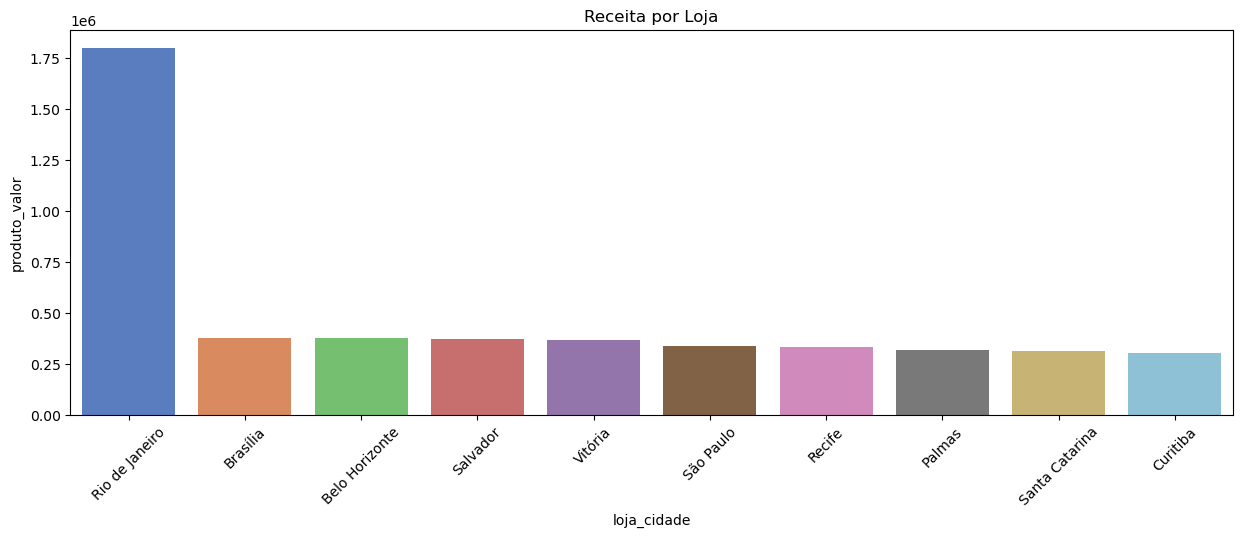

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(
    x=graf_dado.index,
    y=graf_dado['produto_valor'],
    hue=graf_dado.index,
    palette='muted',
    legend=False
)
plt.title('Receita por Loja')
plt.xticks(rotation=45)
plt.show()

## Receita por Produto

In [50]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

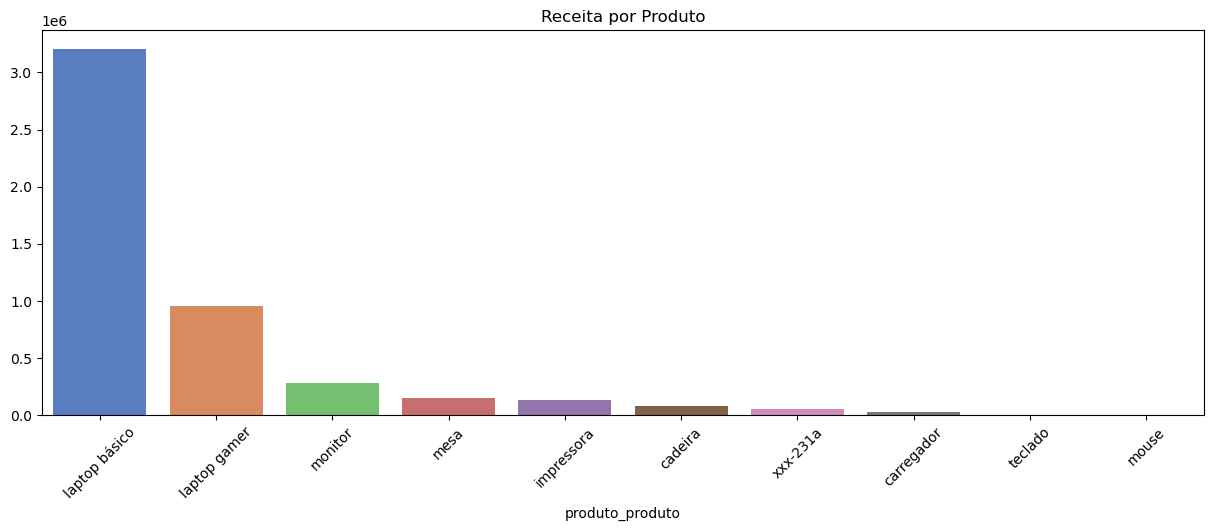

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x=graf_dados.index, y=graf_dados.values,hue= graf_dados.index, palette='muted')
plt.title('Receita por Produto')
plt.xticks(rotation=45)  
plt.show()

## Subplots

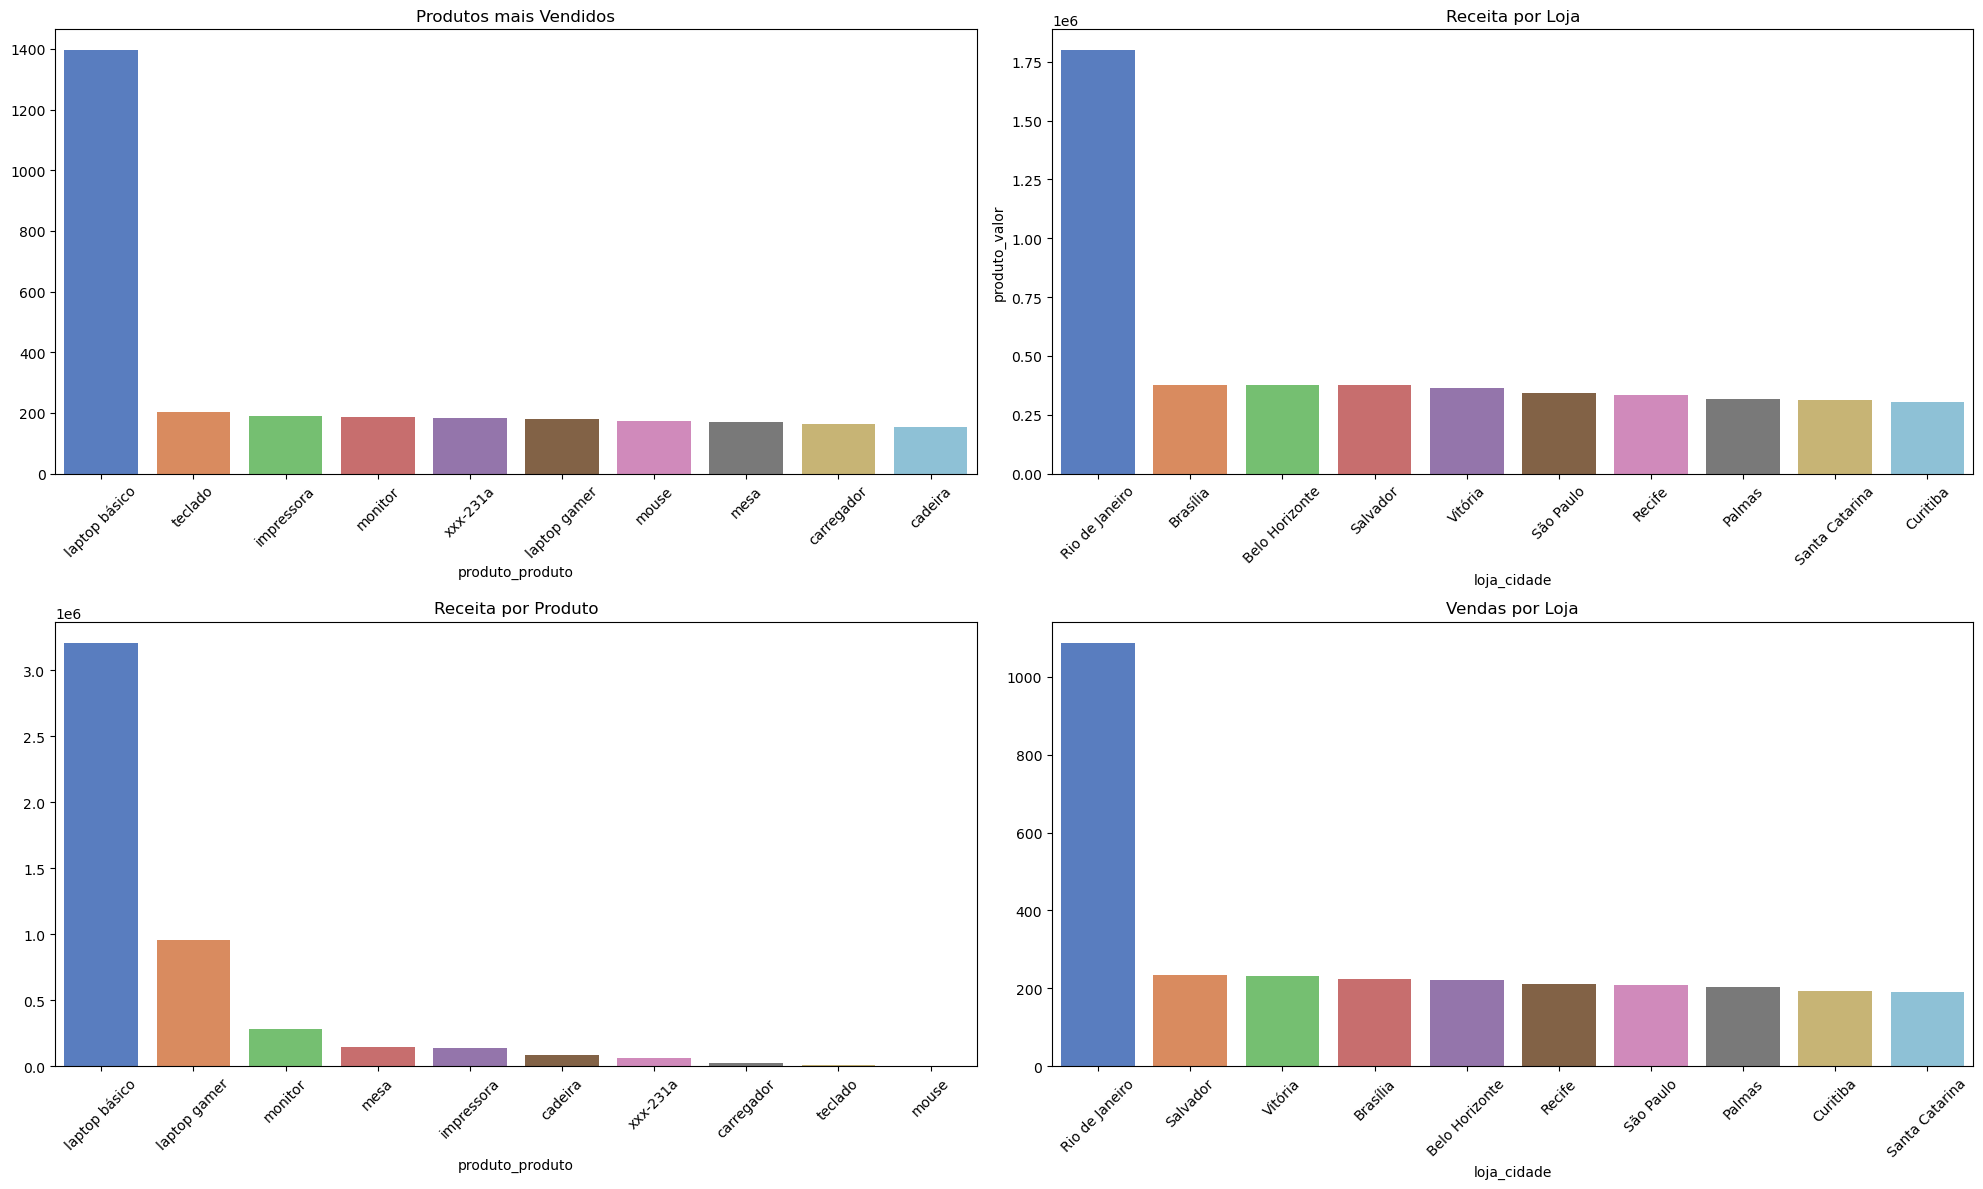

In [52]:
plt.figure(figsize=(20,12))


plt.subplot(2,2,1)
sns.barplot(x=graf_produtos.index, y=graf_produtos.values, hue=graf_produtos.index, palette='muted')
plt.title('Produtos mais Vendidos')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  


plt.subplot(2,2,2)
graf_dado = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().sort_values(by='produto_valor', ascending=False)
sns.barplot(x=graf_dado.index, y=graf_dado['produto_valor'], hue=graf_dado.index, palette='muted')
plt.title('Receita por Loja')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)


plt.subplot(2,2,3)
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
sns.barplot(x=graf_dados.index, y=graf_dados.values, hue=graf_dados.index, palette='muted')
plt.title('Receita por Produto')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.subplot(2,2,4)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
sns.barplot(x=graf_dados.index, y=graf_dados.values, hue=graf_dados.index, palette='muted')
plt.title('Vendas por Loja')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


## Receita por cliente

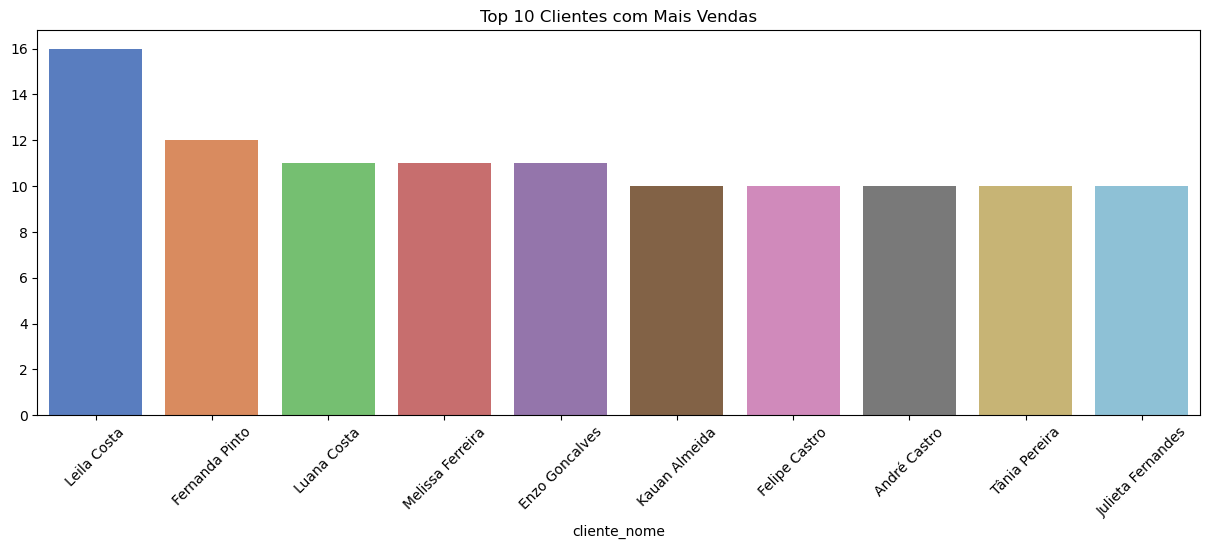

In [53]:
dado_clientes = df.groupby('cliente_nome').count().produto_valor.sort_values(ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot( 
    x=dado_clientes.index,
    y=dado_clientes.values,
    hue=dado_clientes.index,
    palette='muted')
plt.title('Top 10 Clientes com Mais Vendas')
plt.xticks(rotation=45)
plt.show()

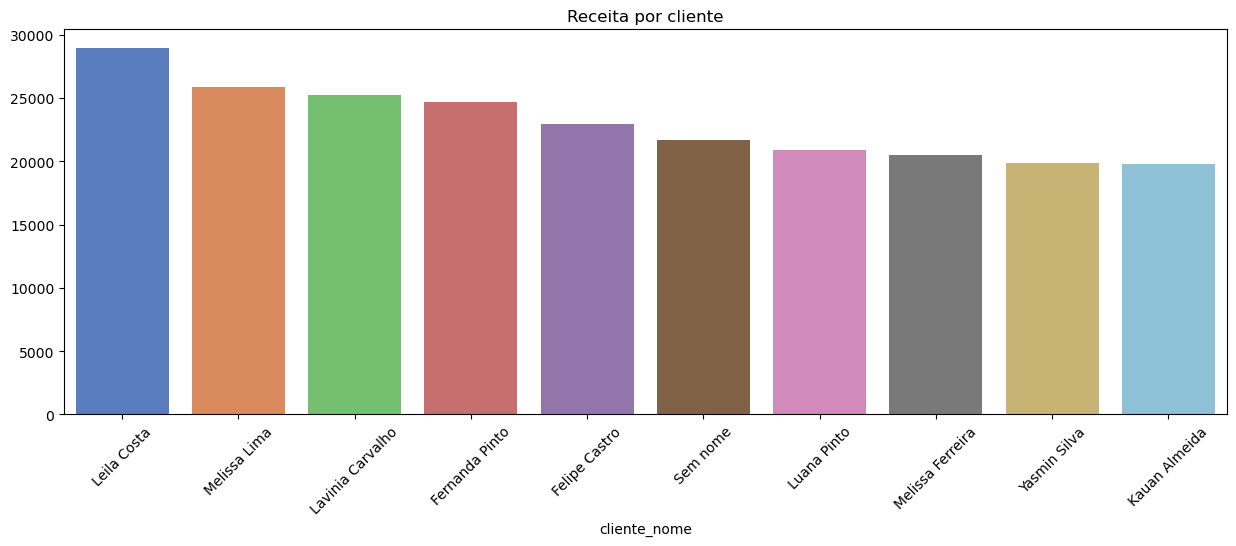

In [54]:
dado_cliente = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(
    x=dado_cliente.index,
    y=dado_cliente.values,
    hue=dado_cliente.index,
       palette='muted')
plt.title('Receita por cliente')
plt.xticks(rotation=45)
plt.show()

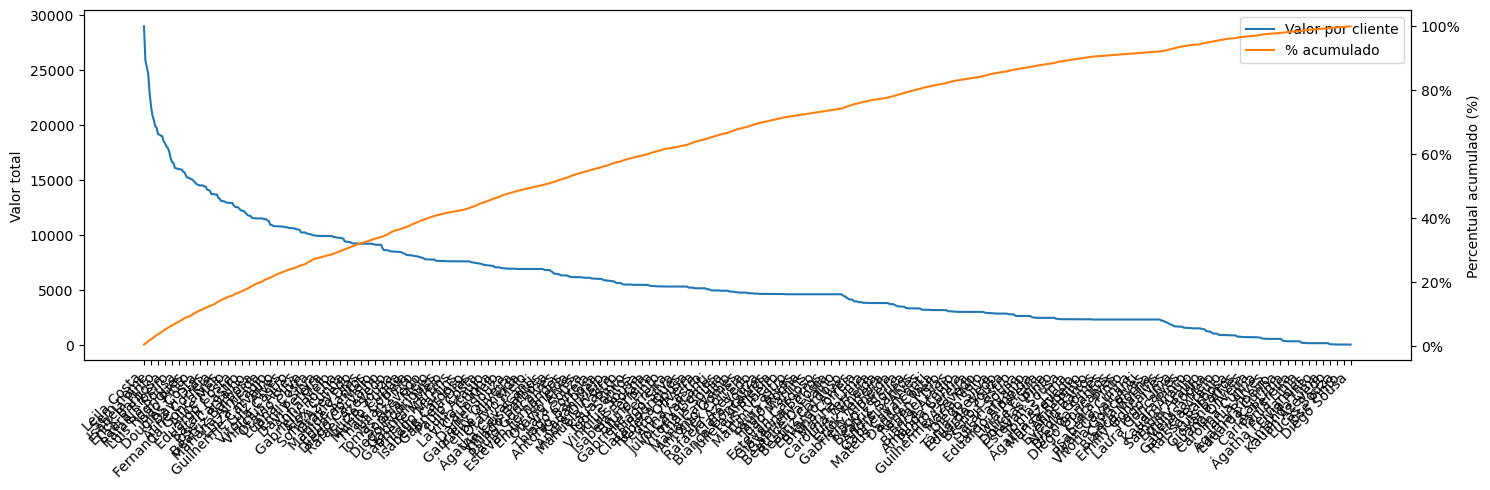

In [55]:
from matplotlib.ticker import PercentFormatter
dado_cliente = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)

# Contagem de produtos por cliente, na mesma ordem
dado_quantidade = df.groupby('cliente_nome').count().produto_valor
dado_quantidade = dado_quantidade.loc[dado_cliente.index]  # alinhar ordem

# Plot
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dado_cliente.index, dado_cliente.values, color='C0', label='Valor por cliente')


ax2 = ax.twinx()
acumulado_pct = dado_quantidade.cumsum() / dado_quantidade.sum() * 100
ax2.plot(dado_quantidade.index, acumulado_pct.values, color='C1', label='% acumulado')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_xticks(dado_cliente.index[::5])  
ax.set_xticklabels(dado_cliente.index[::5], rotation=45, ha='right')
ax.set_ylabel("Valor total")
ax2.set_ylabel("Percentual acumulado (%)")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [56]:
receita_acumulado = dado_cliente.cumsum() / dado_cliente.sum()
proporcao = receita_acumulado[receita_acumulado < 0.60].count() / receita_acumulado.count()
proporcao

np.float64(0.3170731707317073)

## Pareto

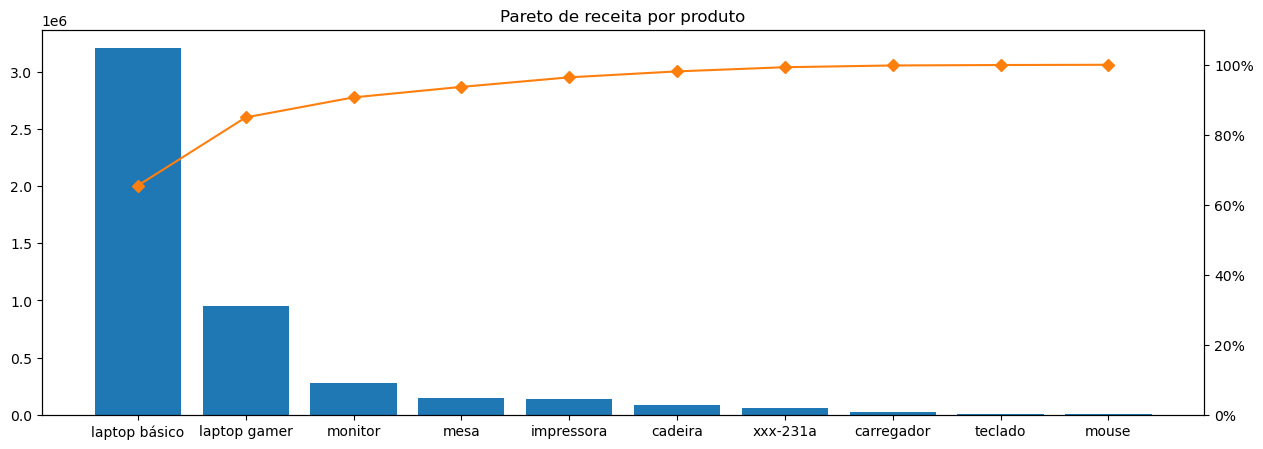

In [57]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax =plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color= 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto')
plt.show()

## Receita combinando produto-loja

In [58]:
graf_dados = (
    df.groupby(['loja_cidade', 'produto_produto'])['produto_valor']
      .sum()
      .reset_index()
      .rename(columns={
          'loja_cidade': 'loja',
          'produto_produto': 'produto',
          'produto_valor': 'receita'
      })
)
graf_dados

,loja,produto,receita
0,Belo Horizonte,cadeira,6480.0000
1,Belo Horizonte,carregador,1800.0000
2,Belo Horizonte,impressora,11200.0000
3,Belo Horizonte,laptop básico,232300.0000
4,Belo Horizonte,laptop gamer,84800.0000
...,...,...,...
95,Vitória,mesa,12040.0000
96,Vitória,monitor,19500.0000
97,Vitória,mouse,320.0000
98,Vitória,teclado,360.0000


In [59]:
graf_dados = graf_dados.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')
sns.heatmap(graf_dados)

<Axes: xlabel='produto', ylabel='loja'>

In [60]:
graf_dados = (
    df.groupby(['loja_cidade', 'produto_produto'])['produto_valor']
      .sum()
      .reset_index()
      .rename(columns={
          'loja_cidade': 'loja',
          'produto_produto': 'produto',
          'produto_valor': 'receita'
      })
)
graf_dados = graf_dados.sort_values(by='receita', ascending=False)
graf_dados


,loja,produto,receita
53,Rio de Janeiro,laptop básico,1189100.0
54,Rio de Janeiro,laptop gamer,344500.0
63,Salvador,laptop básico,264500.0
13,Brasília,laptop básico,250700.0
93,Vitória,laptop básico,241500.0
...,...,...,...
17,Brasília,mouse,220.0
67,Salvador,mouse,220.0
7,Belo Horizonte,mouse,200.0
77,Santa Catarina,mouse,200.0


In [61]:
graf_dados['lojaprod'] = graf_dados.loja + '-' + graf_dados.produto
graf_dados

,loja,produto,receita,lojaprod
53,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
54,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
63,Salvador,laptop básico,264500.0,Salvador-laptop básico
13,Brasília,laptop básico,250700.0,Brasília-laptop básico
93,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
17,Brasília,mouse,220.0,Brasília-mouse
67,Salvador,mouse,220.0,Salvador-mouse
7,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse
77,Santa Catarina,mouse,200.0,Santa Catarina-mouse


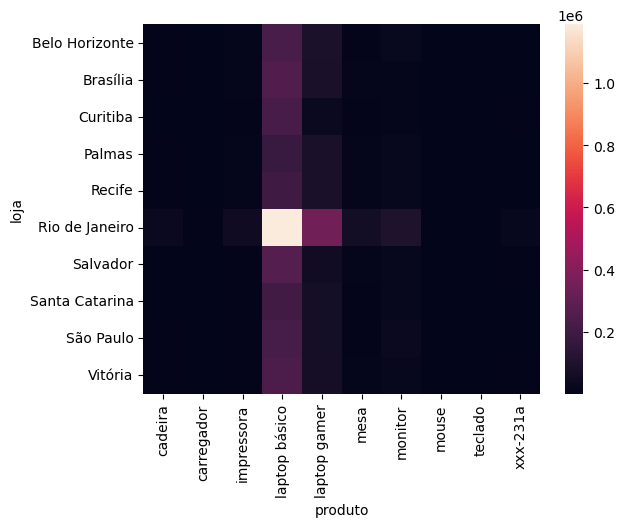

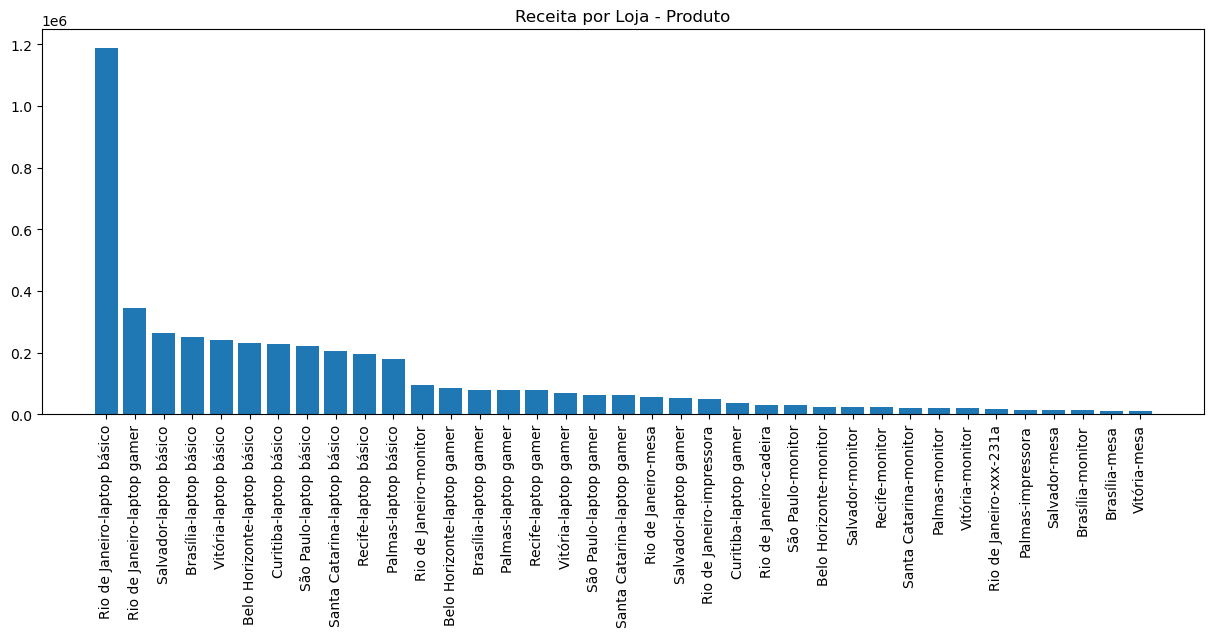

In [62]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita>0.01*graf_dados.receita.max()], graf_dados.receita[graf_dados.receita>0.01*graf_dados.receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por Loja - Produto')
plt.show()

# Análises de Tempo

## Tempo médio de pagamento 

In [63]:
df.tempo_pg.mean()

np.float64(22.47200772200772)

In [64]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')

Text(0.5, 1.0, 'Boxplot para tempo de pagamento')

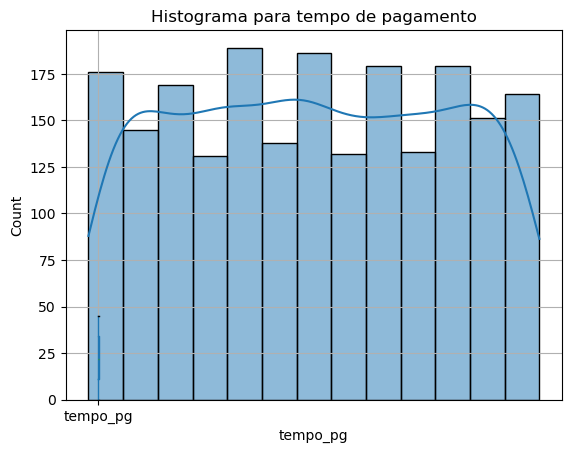

In [65]:
sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')
plt.show()

In [66]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

## Tempo de pagamento por cidade e produto

In [67]:
graf_dados = df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').mean().tempo_pg
graf_dados

loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

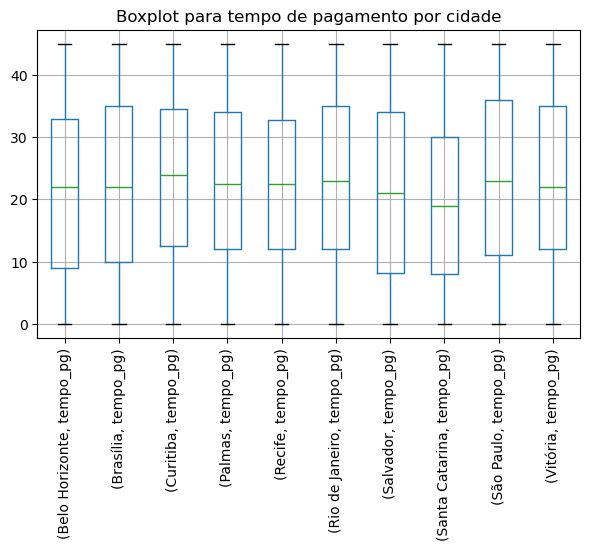

In [68]:
plt.figure(figsize=(7,4))
graf_dados = df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

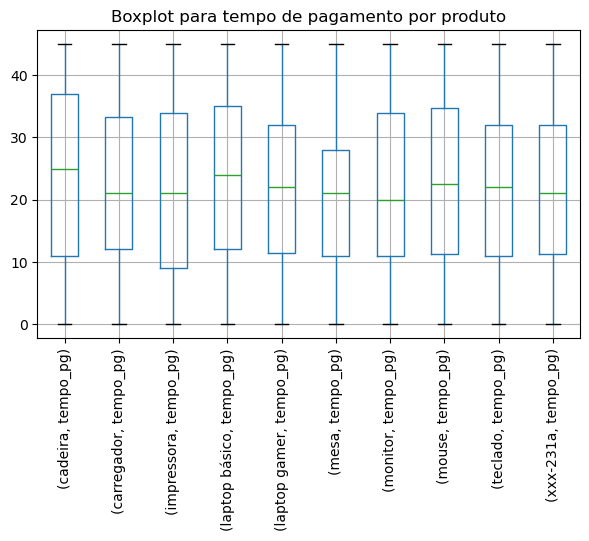

In [69]:
plt.figure(figsize=(7,4))
graf_dados = df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

## Sazonalidade

In [70]:
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
graf_dados

,produto_valor
dt_venda,
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-10,NaN
...,...
2020-09-20,7407.673893
2020-09-22,7635.302720
2020-09-24,7431.969387


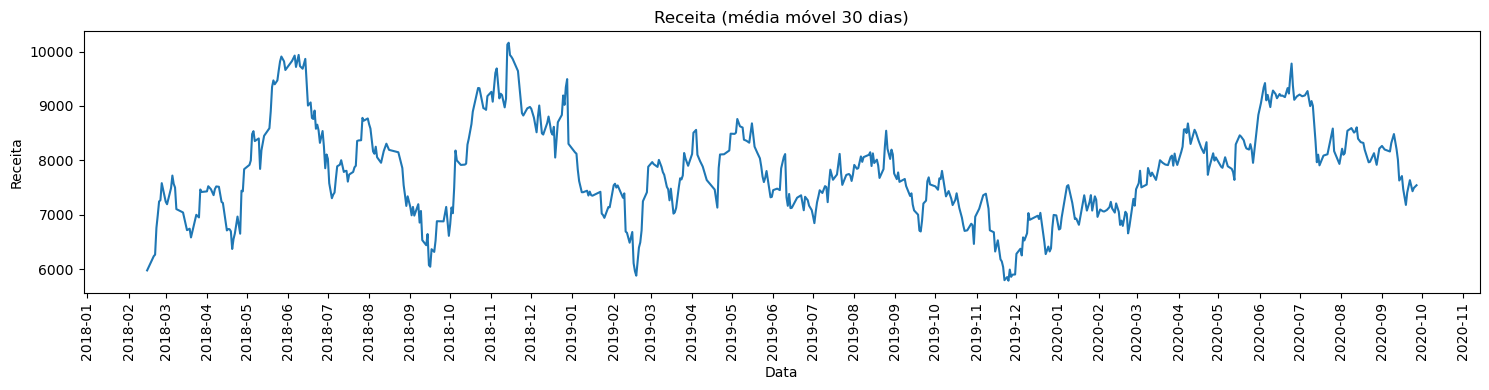

In [71]:
import matplotlib.dates as mdates
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()

plt.figure(figsize=(15,4))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita (média móvel 30 dias)')
plt.xlabel('Data'); plt.ylabel('Receita')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))   # 1 tick por mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))   # formata AAAA-MM
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [72]:
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year
fig, ax =plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor', 'venda_ano']].groupby(['venda_ano']).sum().unstack().plot(ax=ax)

## Tempo médio de pagamento caso promoção

In [73]:
promocao = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
df['id_venda'] = df.index

df_full = df.merge(promocao, on='id_venda', how='left')
df_full

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,id_venda,promoção
0,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,75,2018,1,0
1,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,53,2018,2,1
2,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,63,2018,3,1
3,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,83,2018,4,0
4,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,84,2018,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,25,2020,2996,0
2996,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,31,2020,2997,0
2997,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,39,2020,2998,0
2998,163,2,1,2020-09-27,Ana Pereira,F,1967-01-10,Rio de Janeiro,mouse,20.0,NaT,0,NaN,58,2020,2999,0


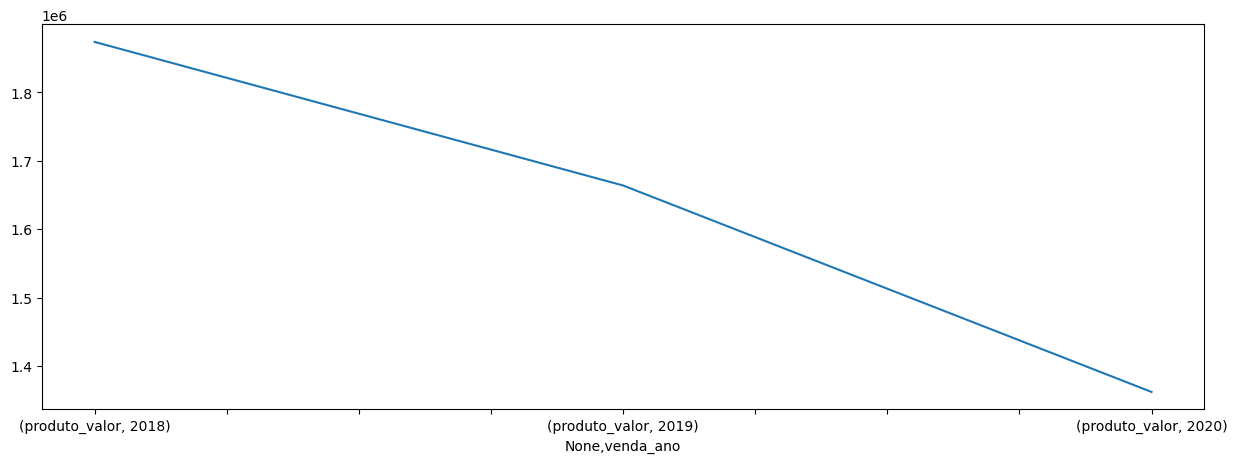

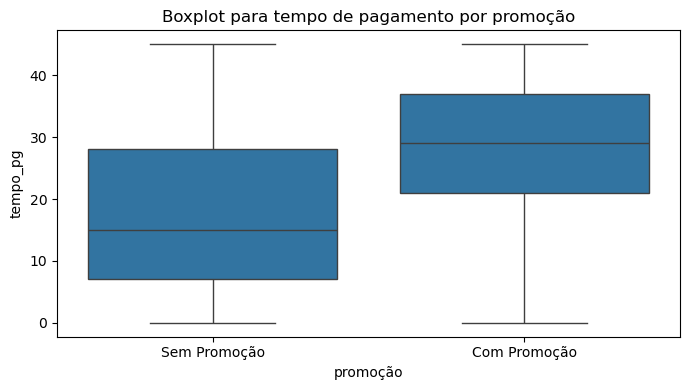

In [74]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='promoção', y='tempo_pg', data=df_full)
plt.title('Boxplot para tempo de pagamento por promoção')
plt.xticks(ticks=[0, 1], labels=['Sem Promoção', 'Com Promoção'])
plt.tight_layout()
plt.show()


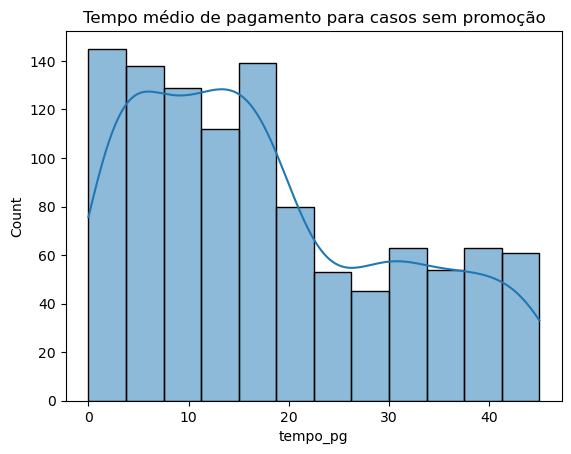

In [75]:
sns.histplot(data=df_full.tempo_pg[df_full['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

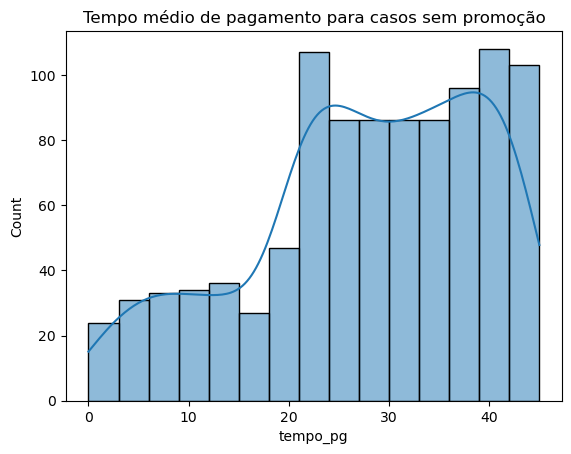

In [76]:
sns.histplot(data=df_full.tempo_pg[df_full['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

# Análise de indadimplência

## Indadimplência por Loja

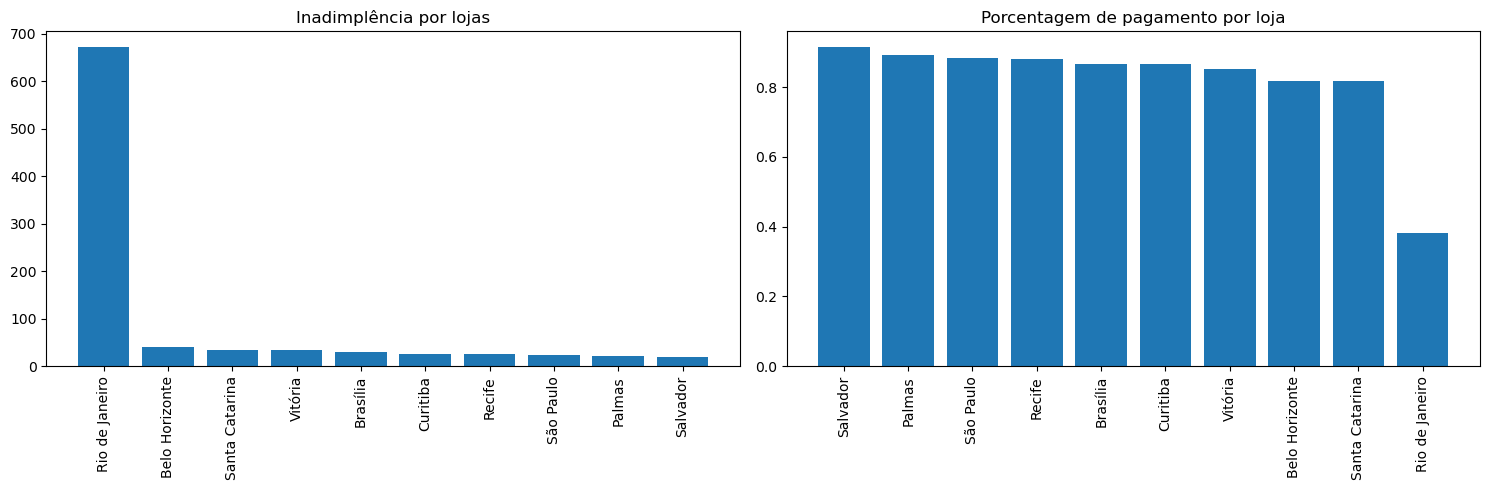

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por lojas')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df[['loja_cidade', 'pg']].groupby('loja_cidade').mean().pg.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Inadimplência por Produto

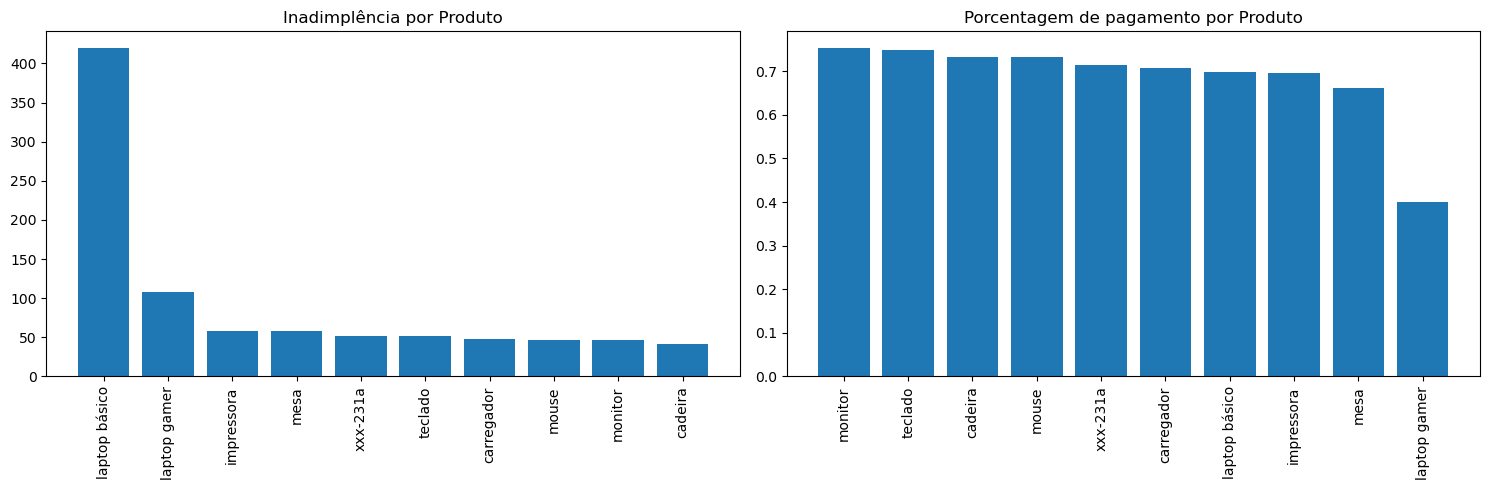

In [78]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por Produto')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df[['produto_produto', 'pg']].groupby('produto_produto').mean().pg.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por Produto')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [79]:
df['dt_venda'] = pd.to_datetime(df['dt_venda'], format='%Y/%m/%d', errors='coerce')
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,venda_ano,id_venda
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,75,2018,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,53,2018,2
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,63,2018,3
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,83,2018,4
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,84,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,25,2020,2996
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,31,2020,2997
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,39,2020,2998


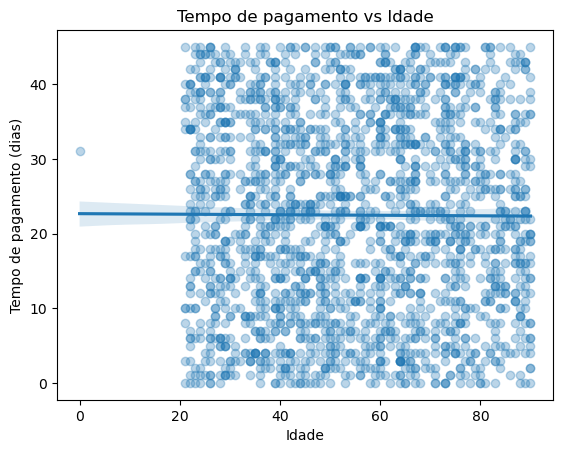

In [80]:
sns.regplot(data=df, x='cliente_idade', y='tempo_pg', scatter_kws={'alpha':0.3})
plt.xlabel('Idade'); plt.ylabel('Tempo de pagamento (dias)')
plt.title('Tempo de pagamento vs Idade')
plt.show()

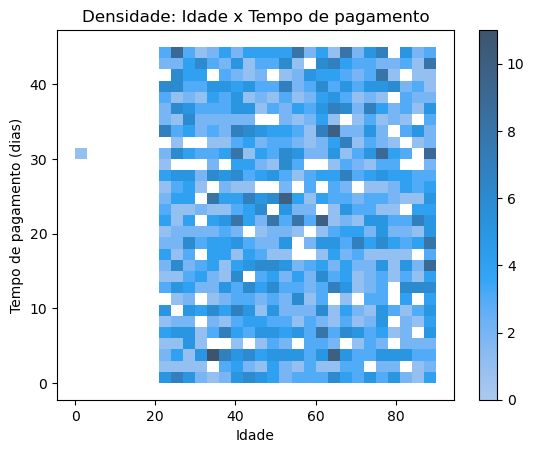

In [81]:
sns.histplot(data=df, x='cliente_idade', y='tempo_pg', bins=30, cbar=True)
plt.xlabel('Idade'); plt.ylabel('Tempo de pagamento (dias)')
plt.title('Densidade: Idade x Tempo de pagamento')
plt.show()

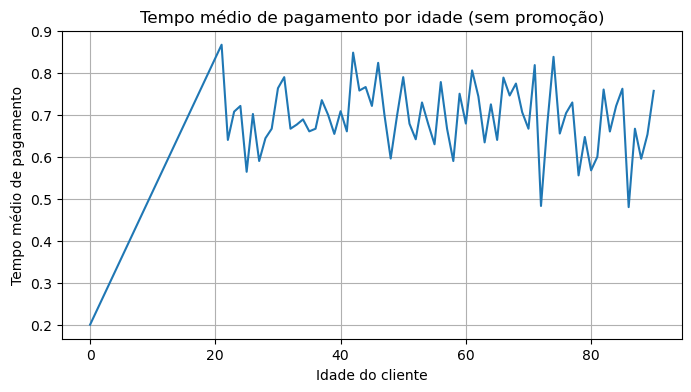

In [82]:
graf_dados = df[['cliente_idade', 'pg']].groupby('cliente_idade').mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='cliente_idade', y='pg', data=graf_dados)
plt.title('Tempo médio de pagamento por idade (sem promoção)')
plt.xlabel('Idade do cliente')
plt.ylabel('Tempo médio de pagamento')
plt.grid(True)
plt.show()

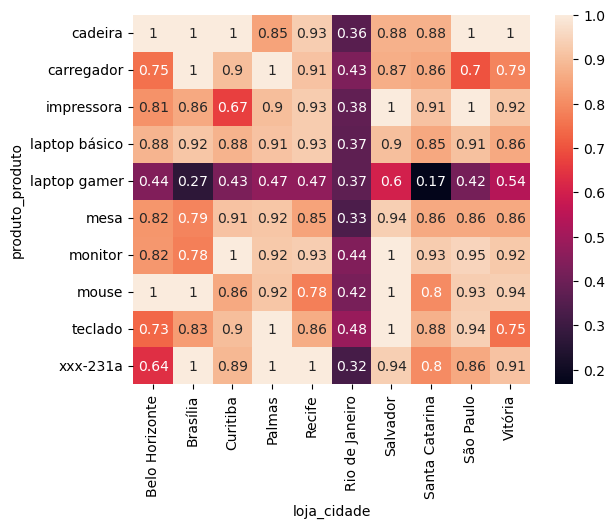

In [83]:
graf_dados = df.pivot_table(index = 'produto_produto', columns = 'loja_cidade', values= 'pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

# Machine Learning 

In [86]:
import copy
dfml = df_full[['cliente_sexo', 'loja_cidade', 'produto_produto', 'produto_valor', 'cliente_idade', 'promoção', 'pg']]
dfml = dfml.replace([' ','-'],'_', regex=True)
dfml

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
0,M,Palmas,laptop_básico,2300.0,75,0,1
1,F,Palmas,laptop_básico,2300.0,53,1,1
2,M,Salvador,cadeira,540.0,63,1,1
3,M,Belo_Horizonte,laptop_básico,2300.0,83,0,0
4,M,Palmas,mouse,20.0,84,0,1
...,...,...,...,...,...,...,...
2995,F,Curitiba,carregador,150.0,25,0,1
2996,F,Brasília,laptop_básico,2300.0,31,0,1
2997,M,Rio_de_Janeiro,laptop_gamer,5300.0,39,0,0
2998,F,Rio_de_Janeiro,mouse,20.0,58,0,0


## Normalização

In [87]:
dfml['produto_valor'] = dfml['produto_valor']/dfml['produto_valor'].max()
dfml['cliente_idade'] = dfml['cliente_idade']/dfml['cliente_idade'].max()
dfml

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
0,M,Palmas,laptop_básico,0.433962,0.833333,0,1
1,F,Palmas,laptop_básico,0.433962,0.588889,1,1
2,M,Salvador,cadeira,0.101887,0.700000,1,1
3,M,Belo_Horizonte,laptop_básico,0.433962,0.922222,0,0
4,M,Palmas,mouse,0.003774,0.933333,0,1
...,...,...,...,...,...,...,...
2995,F,Curitiba,carregador,0.028302,0.277778,0,1
2996,F,Brasília,laptop_básico,0.433962,0.344444,0,1
2997,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.433333,0,0
2998,F,Rio_de_Janeiro,mouse,0.003774,0.644444,0,0


## Dados categóricos

In [94]:
col_cat = ['cliente_sexo', 'loja_cidade', 'produto_produto']
dfml_dummies = pd.get_dummies(dfml[col_cat].astype(str), drop_first=False, dtype=int)
dfml_dummies


,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2996,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2997,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2998,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
 dfml = pd.concat([dfml, dfml_dummies], axis=1)
dfml = dfml.drop(col_cat, axis=1)
dfml

,produto_valor,cliente_idade,promoção,pg,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
0,0.433962,0.833333,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.433962,0.588889,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.101887,0.700000,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.433962,0.922222,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.003774,0.933333,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.028302,0.277778,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2996,0.433962,0.344444,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2997,1.000000,0.433333,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2998,0.003774,0.644444,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y =dfml.pg
x = dfml.drop(['pg'], axis=1)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_new = X.loc[[2998,2999]]
X_new



,produto_valor,cliente_idade,promoção,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
2998,0.003774,0.644444,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2999,0.005660,0.900000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Regressão Logística 

In [113]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfml.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfml,
                 family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Mon, 04 Aug 2025   Deviance:                       2677.1
Time:                        10:36:15   Pearson chi2:                 3.01e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(penalty=None, solver='newton-cg')
model.fit(x_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(x_test)))

print('\n- Reporte completo (dados de treino + teste)')
print(classification_report(y, model.predict(x)))

print('\n- Reporte teste')
print(classification_report(y_test, model.predict(x_test)))



- Matriz de Confusão
[[180 115]
 [ 76 529]]

- Reporte completo (dados de treino + teste)
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [130]:
model.predict(X_new)

array([0, 1])

## Árvore de decisão

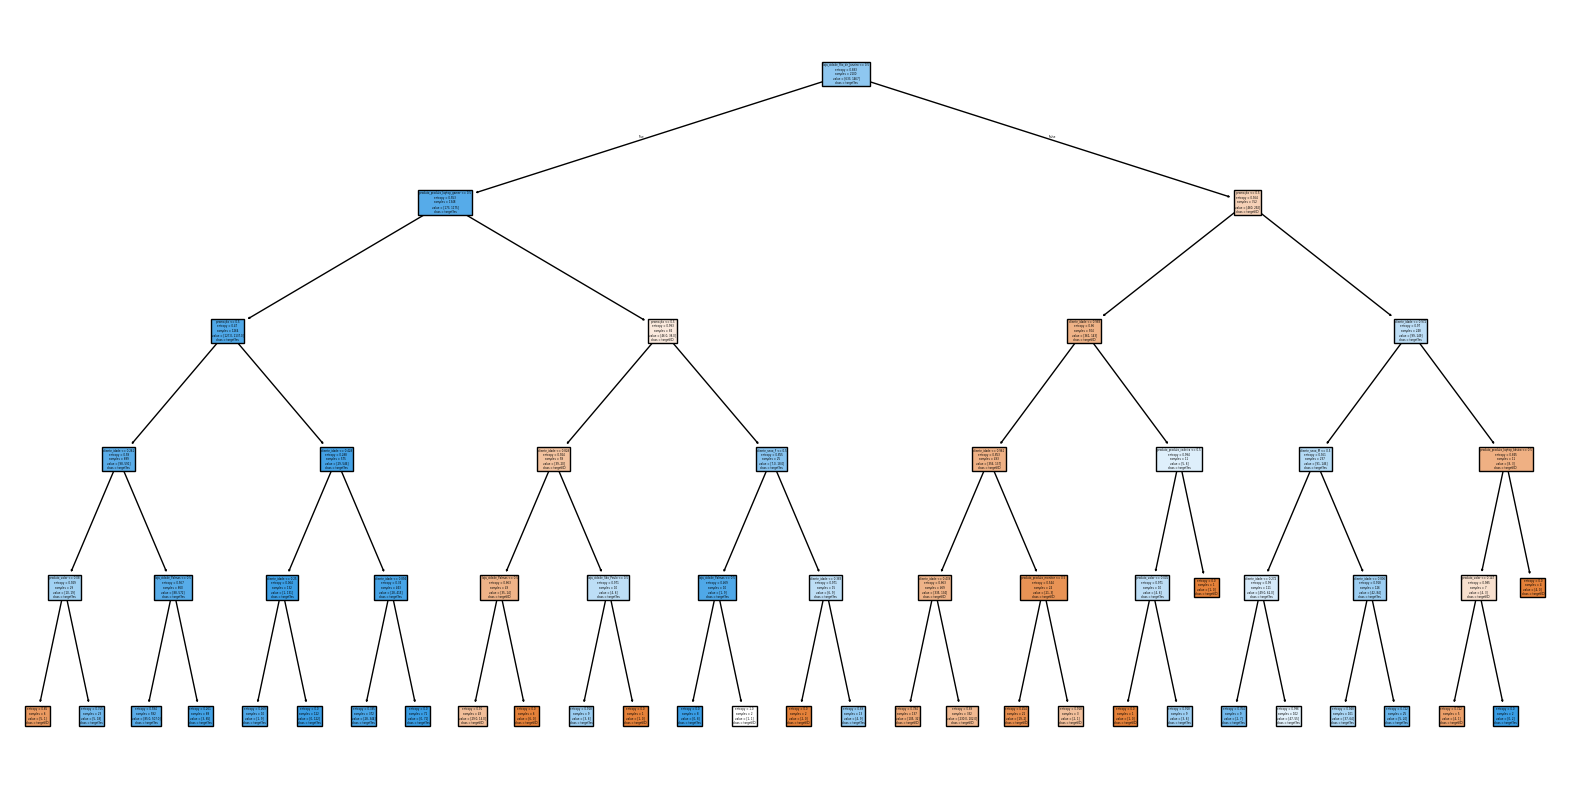

In [134]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

modelo =DecisionTreeClassifier(criterion='entropy', max_depth=5)
modelo = modelo.fit(x_train,y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(modelo,
                  feature_names=X.columns, 
                  class_names=['targetNO', 'targetYes'], 
                  filled=True)
plt.show()

In [137]:
print('- Matriz de confusão')
print(confusion_matrix(y_test, modelo.predict(x_test)))
print('\n- Reporte complete')
print(classification_report(y, model.predict(x)))
print('\n- Reporte teste')
print(classification_report(y_test, modelo.predict(x_test)))

- Matriz de confusão
[[183 112]
 [ 82 523]]

- Reporte complete
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       295
           1       0.82      0.86      0.84       605

    accuracy                           0.78       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.78      0.78       900



In [138]:
model.predict(X_new)

array([0, 1])

## Rede neural 

In [162]:
import tensorflow as tf
tf.random.set_seed(2)

# Se estiver usando x_train/x_test e y_train/y_test:
X_tr = x_train.values.astype("float32")
X_te = x_test.values.astype("float32")
y_tr = y_train.values.astype("float32")
y_te = y_test.values.astype("float32")

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu',
                          kernel_initializer='random_normal',
                          input_shape=(x_train.shape[1],)),  # só define no 1º layer
    tf.keras.layers.Dense(14, activation='relu',  kernel_initializer='random_normal'),
    tf.keras.layers.Dense(6, activation='relu',  kernel_initializer='random_normal'),
    tf.keras.layers.Dense(6, activation='relu',  kernel_initializer='random_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal')  # saída p/ binário
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=50, batch_size=32, verbose=0)

In [163]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128, epochs=300, verbose=0)

In [165]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# probabilidades
p_test = modelo.predict(x_test)          # shape (n, 1)
p_all  = modelo.predict(x)

# binariza (0/1) com limiar 0.5
yhat_test = (p_test >= 0.5).astype(int).ravel()
yhat_all  = (p_all  >= 0.5).astype(int).ravel()

print('- Matriz de confusão')
print(confusion_matrix(y_test, yhat_test))

print('\n- Reporte completo')
print(classification_report(y, yhat_all))

print('\n- Reporte teste')
print(classification_report(y_test, yhat_test))


- Matriz de confusão
[[183 112]
 [ 82 523]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       928
           1       0.85      0.89      0.87      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       295
           1       0.82      0.86      0.84       605

    accuracy                           0.78       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.78      0.78       900



In [159]:
model.predict(X_new)

array([0, 1])

## Xgboost 

In [156]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [158]:
print('- Matriz de confusão')
print(confusion_matrix(y_test, modelo.predict(x_test)))
print('\n- Reporte complete')
print(classification_report(y, model.predict(x)))
print('\n- Reporte teste')
print(classification_report(y_test, modelo.predict(x_test)))


- Matriz de confusão
[[183 112]
 [ 82 523]]

- Reporte complete
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       928
           1       0.89      0.92      0.90      2072

    accuracy                           0.86      3000
   macro avg       0.85      0.83      0.84      3000
weighted avg       0.86      0.86      0.86      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       295
           1       0.82      0.86      0.84       605

    accuracy                           0.78       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.78      0.78       900



In [160]:
model.predict(X_new)

array([0, 1])